In [2]:
file_path='/Users/wtsama/Desktop/movies.xlsx'

In [3]:
import pandas as pd
import numpy as np

### 1.输出前几行

In [82]:
df = pd.read_excel(file_path)
print(df.head(5))

   电影ID   电影名  上映年度                                电影英文名     类型  \
0  1002  茉莉花开  2004                        Jasmine Women     爱情   
1  1007  无间道2  2003                      Mou gaan dou II  警匪/动作   
2  1008  无间道3  2003  Mou gaan dou III: Jung gik mou gaan     警匪   
3  1016    墨攻  2006                             Muk gong     战争   
4  1019    武士  2003                                 Musa     战争   

                                                  片长            上映时间   制式  \
0                                      China:130 min   2004-6-15（中国）   2D   
1                                            119 min    2003-9-5（中国）   2D   
2    Argentina:118 min (Mar del Plata Film Festival)  2003-12-11（中国）   2D   
3                                  Hong Kong:133 min  2006-11-23（中国）   2D   
4  158 min  | Argentina:155 min  | Canada:154 min...   2003-1-10（中国）  NaN   

           国家及地区     累计票房             发行公司                            导演  \
0             中国   521.8万      中国保利华亿传媒公司,                

### 1.重命名列名为 ['id', 'region', 'currency', 'week', 'date_gap', 'avg_audience’, 'week_salary', 'accum_salary’]；
 - **这里的数据有的列名是错的，需要修改（有的英文列名对不上中文）**
 - **列名的长度对不上，只能部分修改列名**

In [83]:
print(df.columns)

Index(['电影ID', '电影名', '上映年度', '电影英文名', '类型', '片长', '上映时间', '制式', '国家及地区',
       '累计票房', '发行公司', '导演', '主演', '制片公司列表', '发行公司列表'],
      dtype='object')


In [84]:
column_mapping = {
    '电影ID': 'id',
    '国家及地区': 'region',
    '类型': 'currency',
    '上映时间': 'week',
    '上映年度': 'date_gap',
    '片长': 'avg_audience',
    '累计票房': 'week_salary',
    '发行公司': 'accum_salary'
}
df = df.rename(columns=column_mapping)
print(df.head(3))

     id   电影名  date_gap                                电影英文名 currency  \
0  1002  茉莉花开      2004                        Jasmine Women       爱情   
1  1007  无间道2      2003                      Mou gaan dou II    警匪/动作   
2  1008  无间道3      2003  Mou gaan dou III: Jung gik mou gaan       警匪   

                                      avg_audience            week  制式  \
0                                    China:130 min   2004-6-15（中国）  2D   
1                                          119 min    2003-9-5（中国）  2D   
2  Argentina:118 min (Mar del Plata Film Festival)  2003-12-11（中国）  2D   

        region week_salary     accum_salary                            导演  \
0           中国      521.8万      中国保利华亿传媒公司,                  侯咏 Yong Hou,   
1  中国香港/中国/新加坡      800.8万  寰亚影视发行（香港）有限公司,               刘伟强 Andrew Lau,   
2      中国香港/中国     3601.0万  寰亚影视发行（香港）有限公司,  刘伟强 Andrew Lau,麦兆辉 Alan Mak,   

                                                  主演  \
0  章子怡 Ziyi Zhang,陈冲 Joan Chen,姜文 Wen Jiang,刘

### 3.输出描述性统计结果，计算avg_audience，week_salary，accum_salary列的相关性；

In [69]:
df.describe

<bound method NDFrame.describe of          id      电影名  date_gap                                电影英文名 currency  \
0      1002     茉莉花开      2004                        Jasmine Women       爱情   
1      1007     无间道2      2003                      Mou gaan dou II    警匪/动作   
2      1008     无间道3      2003  Mou gaan dou III: Jung gik mou gaan       警匪   
3      1016       墨攻      2006                             Muk gong       战争   
4      1019       武士      2003                                 Musa       战争   
..      ...      ...       ...                                  ...      ...   
424    3622    鬼马狂想曲      2004              Gwai ma kwong seung kuk       喜剧   
425    3623       怪物      2005                             Gwai muk       恐怖   
426  362337     我的左手      2007                         My Left Hand       剧情   
427  362377  特工的特别任务      2010               My Mom's New Boyfriend    动作/爱情   
428  362995       南京      2007                              Nanking      纪录片   

     

- 取出 avg_audience列的每个元素的数字字符串计算持续时间

**_这是因为原文的字符串不能直接进行相关性计算，必须提取数字转化为数值类型_**

In [ ]:
def get_digt(string):
    '''
    Get the first digit from a string'''
    res = ''
    flag = 0
    for i in string:
        if i.isdigit():
            res+=i
            flag = 1
        if flag == 1 and (not i.isdigit()):
            break
    return res

In [86]:
df['avg_audience']=df['avg_audience'].astype(str)
df['avg_audience'] = df['avg_audience'].apply(get_digt)
df['avg_audience'].head(5)
any(df['avg_audience']=='') 

True

In [87]:
df['avg_audience']=df['avg_audience'].replace('', 100)


In [ ]:
def replace_nondigt(string):
    '''
    Replace non-digit characters with 0'''
    if type(string) == str:
        if string.isdigit():
            return string
    string = '0'
    return string

- 将**电影持续时间**转化为数值类型

In [90]:
for i in range(len(df)):
    df.loc[i,'avg_audience']=replace_nondigt(df.loc[i,'avg_audience'])
df['avg_audience'].head(5)
df['avg_audience'].astype(int)

0      130
1      119
2      118
3      133
4      158
      ... 
424    103
425     93
426     82
427     97
428     88
Name: avg_audience, Length: 429, dtype: int64

- 将电影的**累计票房**转化为浮点数，没有信息的转化为 0

In [95]:
def get_digt_salary(salary):
    if salary == '无':
        return 0
    salary = salary.replace('万', '')
    return float(salary)
for i in range(len(df)):
    df.loc[i,'week_salary']=get_digt_salary(df.loc[i,'week_salary'])
df['week_salary'].head(3)

0     521.8
1     800.8
2    3601.0
Name: week_salary, dtype: object

- 计算皮尔逊相关系数

In [98]:
corr_aud_accumsa = df['week_salary'].corr(df['avg_audience'])
print(corr_aud_accumsa)

0.14312810904835674


### 4.检查是否有空值

In [ ]:
any(df.isnull())

True

In [101]:
df = df.dropna()

### 5.提取所有“内地票房”数据，计算内地电影周均票房（得到一个值）；
**这里内地票房是`week_salary`**

In [103]:
np.mean(df['week_salary'])

6541.885227272726

### 6. 以片长为横轴，累计票房为纵轴，绘制散点图

In [106]:
import matplotlib.pyplot as plt

- 累计票房

In [104]:
len(df['week_salary'])

264

- 检查片长的维度是否和票房一致

In [105]:
len(df['avg_audience'])

264

Text(0, 0.5, 'Accumlated Salary (w ¥)')

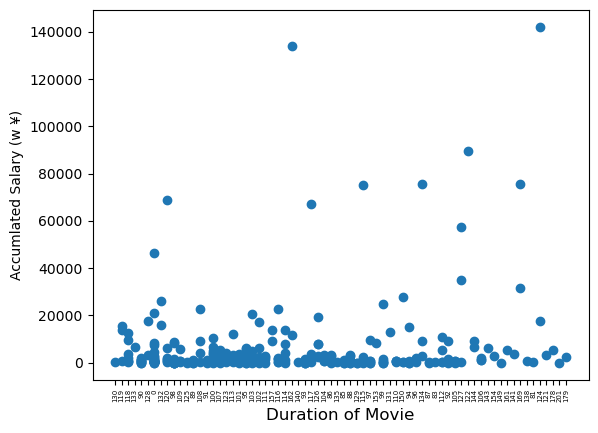

In [114]:
plt.scatter(x = df['avg_audience'], y = df['week_salary'])
plt.xlabel('Duration of Movie',fontsize = 12)
plt.xticks(rotation = 90, fontsize = 5)
plt.ylabel('Accumlated Salary (w ¥)')
